# Import Libraries

In [19]:
#!pip install pytorch==1.12.1 torchvision==0.13.1

usage: conda [-h] [-V] command ...
conda: error: unrecognized arguments: /y


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import tarfile
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
from torchvision.datasets import ImageFolder
from torchvision.datasets.utils import download_url
from torchvision.transforms import ToTensor

import itertools

np.random.seed(69)

In [3]:
# Check torch version
print("torch:", torch. __version__)

# Check torchvision version
print("torchvision:", torchvision. __version__)

torch: 1.13.0+cu117
torchvision: 0.14.0+cu117


# Load Cifar10

In [5]:
# Load Data
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')

Using downloaded and verified file: ./cifar10.tgz


# Split into Train & Test

In [6]:
# Split into Train & Test
train_ds = ImageFolder('./data/cifar10/train', transform=ToTensor())
test_ds = ImageFolder('./data/cifar10/test', transform=ToTensor())
batch_size = 128
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
test_loader = DataLoader(test_ds, batch_size*2, shuffle=True)

# Use CUDA

In [7]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using CUDA")
else:
    device = torch.device("cpu")
    print("Using CPU")

Using CUDA


# CNN Architecture

In [8]:
def ConvLayer(inp, out, ks=3, s=1, p=1):
    return nn.Conv2d(inp, out, kernel_size=ks, stride=s, padding=p)
class CIFAR10(nn.Module):
    def __init__(self):
        super().__init__()
        self.neural_net = nn.Sequential(
            ConvLayer(3, 32), nn.ReLU(),
            ConvLayer(32, 64), nn.ReLU(),
            nn.MaxPool2d(2, 2), 
            ConvLayer(64, 128), nn.ReLU(),
            ConvLayer(128, 256), nn.ReLU(),
            nn.MaxPool2d(2, 2),
            ConvLayer(256, 512), nn.ReLU(),
            ConvLayer(512, 1024), nn.ReLU(),
            nn.MaxPool2d(2, 2), 
            nn.Flatten(),
            nn.Linear(1024*4*4, 1024), nn.ReLU(),
            nn.Linear(1024, 512), nn.ReLU(),
            nn.Linear(512, 10)
        )
    def forward(self, x):
        return self.neural_net(x)

In [9]:
def accuracy_score(out, labels):
    _, preds = torch.max(out, dim=1)
    correct_preds = torch.sum(preds==labels).item()
    total_preds = len(preds)
    accuracy = torch.tensor(correct_preds/total_preds)
    return accuracy

# Fine Tuning SGD Parameters

Different parameters have been tested.  
The parameters are *learning rate, momentum, dampening, weight decay, nesterov, maximize.*

In [10]:
learning_rates=[0.01,0.1]
momentums=[0,0.5,1]
dampenings=[0,0.5,1]
weight_decays=[0,0.01,0.1]
nesterovs=[False]
maximizes=[False]

num_epochs = 20

all_combinations=list(itertools.product(learning_rates, momentums, dampenings, weight_decays, nesterovs, maximizes))
len(all_combinations)

54

1
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.01, 0, 0, 0, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.1033)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.1074)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.1023)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.1150)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.0982)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.1072)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.1022)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.1043)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.1338)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.1244)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.1225)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.1324)
Epoch N

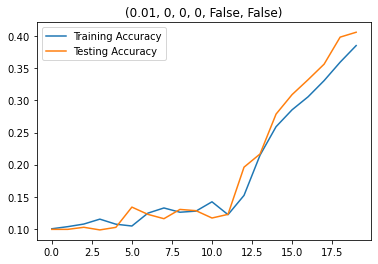

2
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.01, 0, 0, 0.01, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.1001)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.1021)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.0987)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.0994)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.0980)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.0976)
Epoc

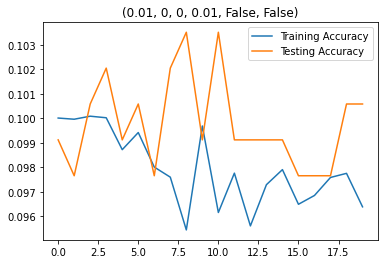

3
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.01, 0, 0, 0.1, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.0993)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.0999)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.0978)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.0975)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.0977)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.0984)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.0974)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.0980)
Epoch

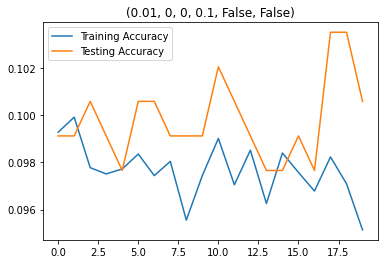

4
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.01, 0, 0.5, 0, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.0994)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.1001)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.1017)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.1001)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.1093)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.1403)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.1180)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.1018)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.1104)
Epoch

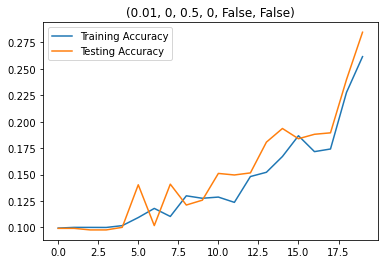

5
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.01, 0, 0.5, 0.01, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.0999)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.0996)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.0996)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.0990)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.0987)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.0982)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.0987)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.0984)
Ep

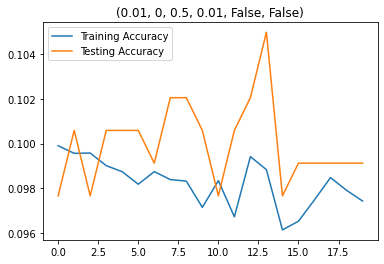

6
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.01, 0, 0.5, 0.1, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.0999)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.1021)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.0967)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.1021)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.0984)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.0957)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.0974)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.0970)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.1079)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.0967)
Epo

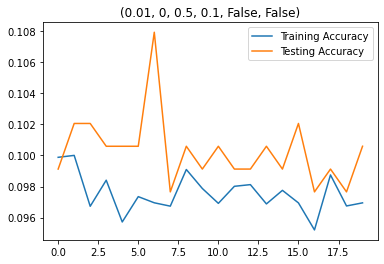

7
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.01, 0, 1, 0, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.1017)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.1021)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.1032)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.1049)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.1180)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.1346)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.1365)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.1583)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.1169)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.1649)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.1503)
Epoch N

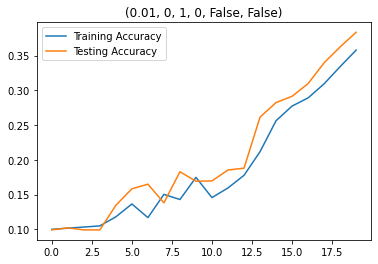

8
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.01, 0, 1, 0.01, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.1004)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.1005)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.1035)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.1021)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.1007)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.1007)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.1151)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.0997)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.0986)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.0971)
Epoc

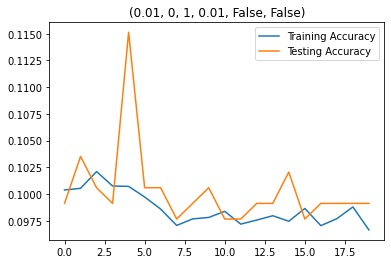

9
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.01, 0, 1, 0.1, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.0999)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.1035)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.0985)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.0990)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.0989)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.0963)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.0974)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.0985)
Epoch

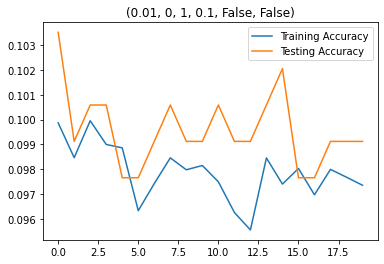

10
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.01, 0.5, 0, 0, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.0993)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.0997)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.1021)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.1016)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.1403)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.1049)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.1093)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.1023)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.1228)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.1110)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.1246)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.1764)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.1567)
Epoc

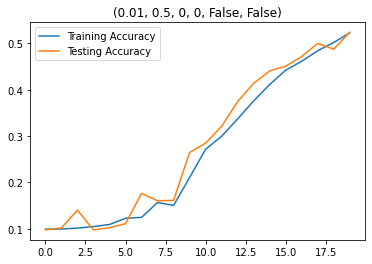

11
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.01, 0.5, 0, 0.01, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.0985)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.0977)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.0993)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.0967)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.0972)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.0974)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.1021)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.0983)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.0974)
E

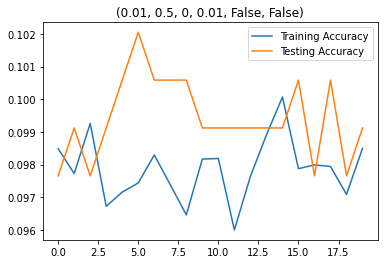

12
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.01, 0.5, 0, 0.1, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.0999)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.0978)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.0981)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.0981)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.0982)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.0992)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.0978)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.1021)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.0994)
Ep

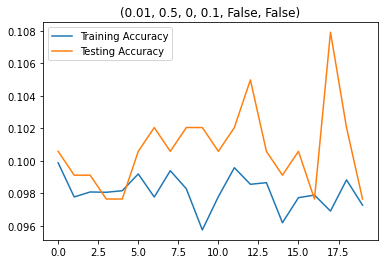

13
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.01, 0.5, 0.5, 0, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.0998)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.0997)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.0997)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.1168)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.1046)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.0992)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.1025)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.1506)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.1077)
Ep

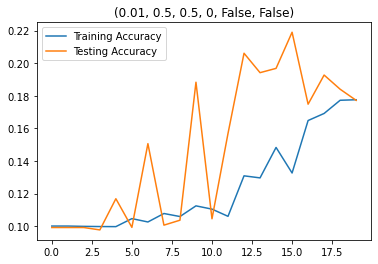

14
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.01, 0.5, 0.5, 0.01, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.0985)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.0987)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.0994)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.0986)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.1021)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.0988)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.1021)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.0987)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.0984)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.0960)

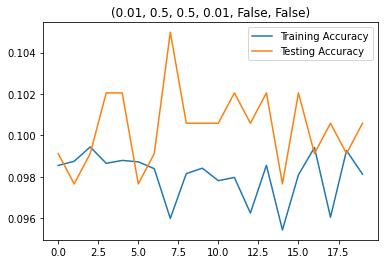

15
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.01, 0.5, 0.5, 0.1, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.0993)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.0991)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.1035)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.0981)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.1021)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.0978)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.0985)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.0983)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.0970)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.0969)


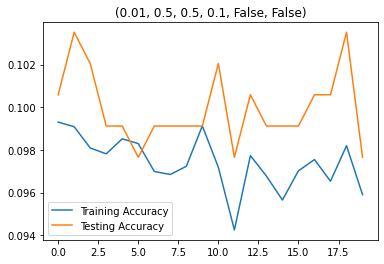

16
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.01, 0.5, 1, 0, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.1021)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.1021)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.1000)
Epoc

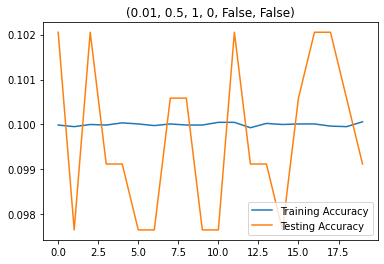

17
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.01, 0.5, 1, 0.01, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.0999)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.1000)
E

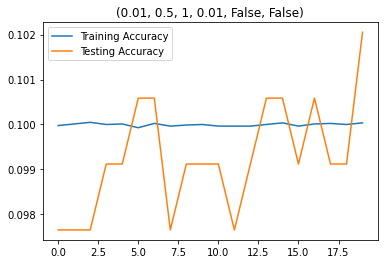

18
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.01, 0.5, 1, 0.1, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.1021)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.1035)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.1035)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.1000)
Ep

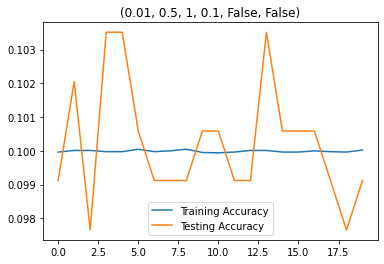

19
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.01, 1, 0, 0, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.1646)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.2326)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.2829)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.2836)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.2499)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.2067)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.1376)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.0993)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.1035)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.1003)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.1050)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.0985)
Epoch 

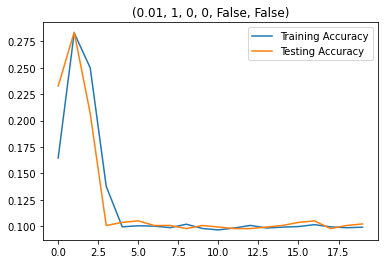

20
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.01, 1, 0, 0.01, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.0999)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.1004)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.1035)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.0965)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.1021)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.0993)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.1001)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.0987)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.0970)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.0990)
Epo

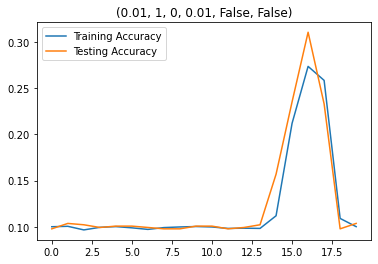

21
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.01, 1, 0, 0.1, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.0985)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.1005)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.1014)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.1021)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.1009)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.1015)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.1021)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.1014)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.1001)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.1004)
Epoc

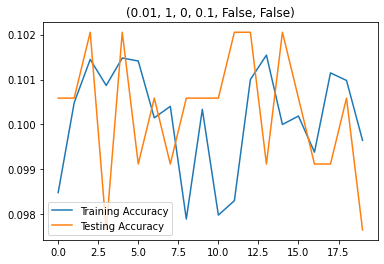

22
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.01, 1, 0.5, 0, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.1143)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.1287)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.1876)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.2232)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.2243)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.1295)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.1021)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.1001)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.1000)
Epoc

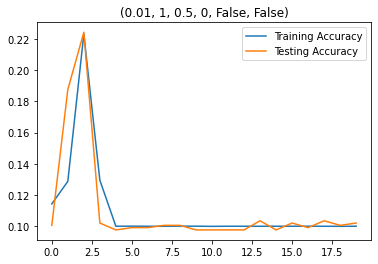

23
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.01, 1, 0.5, 0.01, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.1005)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.1003)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.1035)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.0996)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.0997)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.1021)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.1003)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.1007)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.0972)
E

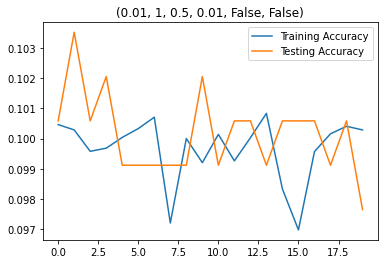

24
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.01, 1, 0.5, 0.1, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.1008)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.1004)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.1003)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.1021)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.0997)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.1015)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.1005)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.0995)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.1021)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.1002)
Ep

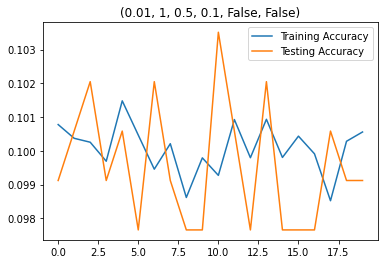

25
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.01, 1, 1, 0, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.1021)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.1021)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.1050)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.0999)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.1021)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.1001)
Epoch 

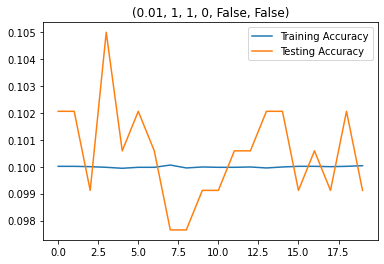

26
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.01, 1, 1, 0.01, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.0995)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.1050)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.1050)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.1000)
Epo

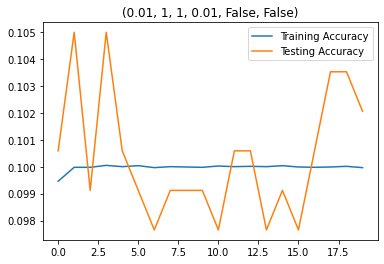

27
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.01, 1, 1, 0.1, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.0997)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.1021)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.1001)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.1035)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.1000)
Epoc

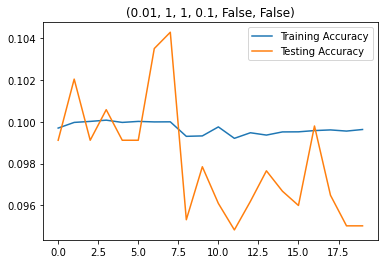

28
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.1, 0, 0, 0, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.1015)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.1031)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.1250)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.2003)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.1055)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.2046)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.2320)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.2970)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.3144)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.3557)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.3712)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.4082)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.4353)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.4791)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.5099)
Epoch N

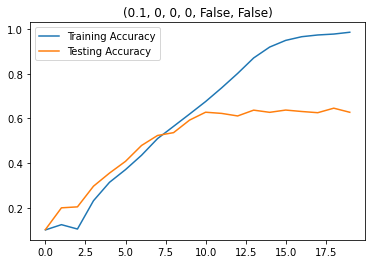

29
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.1, 0, 0, 0.01, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.0980)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.0967)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.0981)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.1050)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.0994)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.0985)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.0976)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.0992)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.1035)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.0969)
Epoc

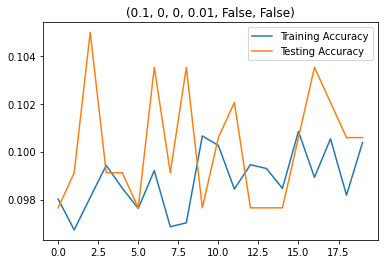

30
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.1, 0, 0, 0.1, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.0999)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.0969)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.1035)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.0997)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.0971)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.1003)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.0966)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.1021)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.1006)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.0998)
Epoch

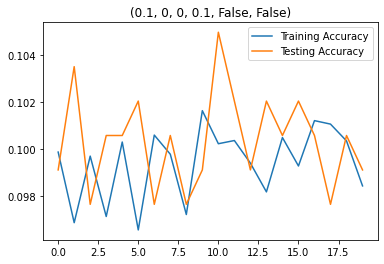

31
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.1, 0, 0.5, 0, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.1001)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.1019)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.1356)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.1739)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.2258)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.2821)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.3562)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.3500)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.3830)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.4023)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.4313)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.4704)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.5180)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.5361)
Epoch

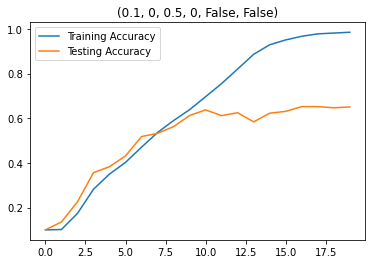

32
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.1, 0, 0.5, 0.01, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.0993)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.0982)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.0983)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.0985)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.1035)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.1004)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.0959)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.0988)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.0991)
Ep

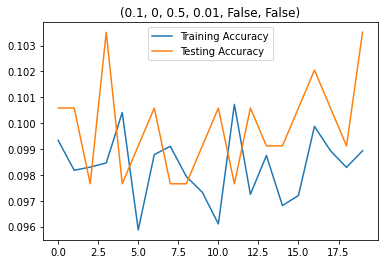

33
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.1, 0, 0.5, 0.1, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.0993)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.1014)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.0981)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.0988)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.1001)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.0987)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.1006)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.0987)
Epo

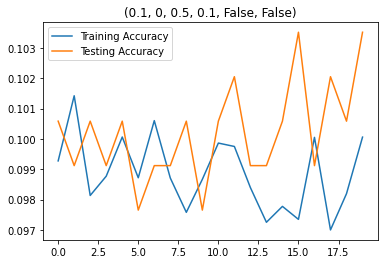

34
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.1, 0, 1, 0, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.1005)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.1195)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.1230)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.1711)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.2371)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.3109)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.3405)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.3870)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.4302)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.4790)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.4983)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.5177)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.5485)
Epoch N

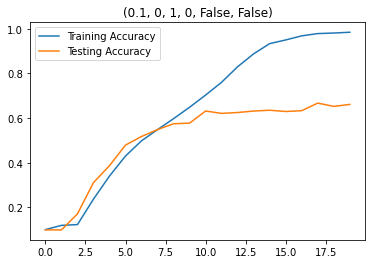

35
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.1, 0, 1, 0.01, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.1001)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.0968)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.1002)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.0986)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.0966)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.0980)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.1001)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.0999)
Epoc

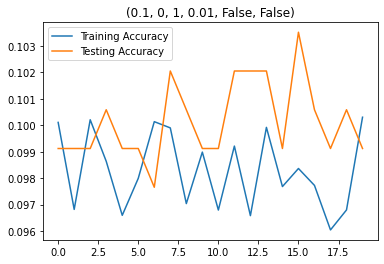

36
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.1, 0, 1, 0.1, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.0990)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.1001)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.0987)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.1021)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.0973)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.1007)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.1021)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.0987)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.0994)
Epoch

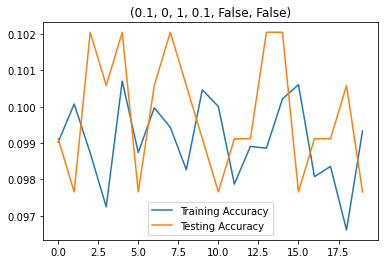

37
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.1, 0.5, 0, 0, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.1032)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.1381)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.1178)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.2115)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.2311)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.2572)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.3720)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.3897)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.5007)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.5317)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.6043)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.6466)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.6884)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.7091)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.7628)
Epoch

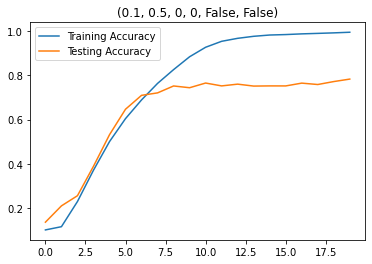

38
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.1, 0.5, 0, 0.01, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.0980)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.1009)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.0999)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.0988)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.0982)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.0983)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.0988)
Ep

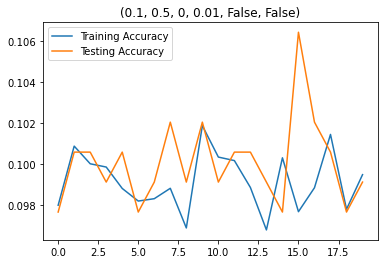

39
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.1, 0.5, 0, 0.1, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.0992)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.0990)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.0999)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.0985)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.1035)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.1012)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.1006)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.1021)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.1011)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.1021)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.1017)
Epo

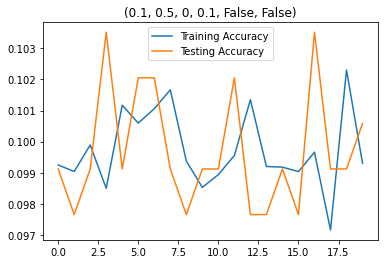

40
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.1, 0.5, 0.5, 0, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.1047)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.1474)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.2038)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.2845)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.3186)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.3443)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.3863)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.4383)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.4760)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.4882)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.5355)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.5460)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.5935)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.5804)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.6422)
Epo

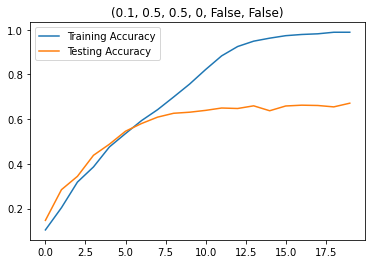

41
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.1, 0.5, 0.5, 0.01, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.0992)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.1005)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.1021)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.0976)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.0980)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.0964)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.0992)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.1003)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.0942)


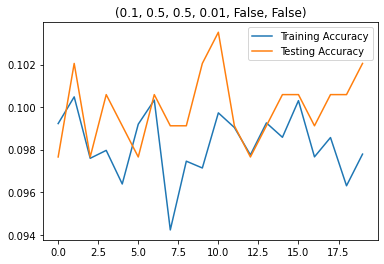

42
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.1, 0.5, 0.5, 0.1, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.1001)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.0999)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.0978)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.1002)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.1021)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.1011)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.0994)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.0960)
E

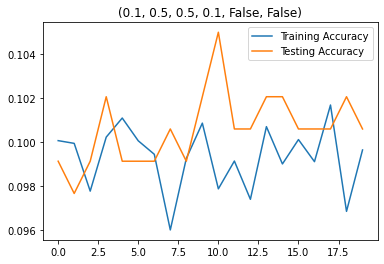

43
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.1, 0.5, 1, 0, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.1021)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.1001)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.1000)
Epoch

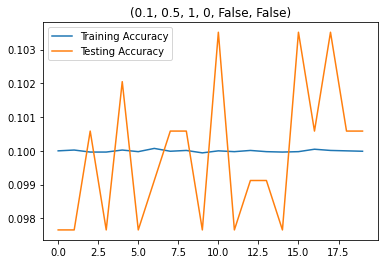

44
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.1, 0.5, 1, 0.01, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.1001)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.1021)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.1000)
Ep

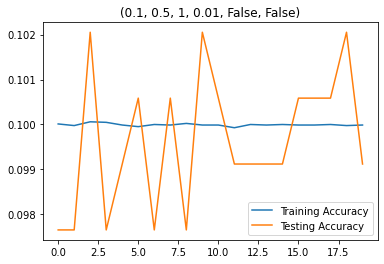

45
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.1, 0.5, 1, 0.1, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.0999)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.1021)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.1000)
Epo

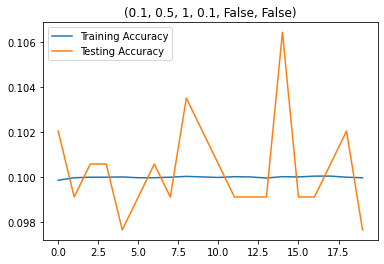

46
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.1, 1, 0, 0, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.0972)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.1023)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.1006)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.0991)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.1001)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.1000)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.0977)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.1000)
Epoch N

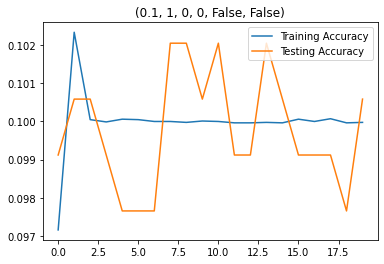

47
lr,momentum,dampening,weight_decay,nesterov,maximize
(0.1, 1, 0, 0.01, False, False)
Epoch Number:  0  | Training Accuracy Score:  tensor(0.0989)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.1006)


In [ ]:
i=0
list_of_figs=[]
for one_combo in all_combinations:
    model = CIFAR10().to(device)
    i+=1
    print(i)
    print("lr,momentum,dampening,weight_decay,nesterov,maximize")
    print(one_combo)
    train_acc=[]
    test_acc=[]
    num_epochs = 20
    learning_rate=one_combo[0]
    momentum=one_combo[1]
    dampening=one_combo[2]
    weight_decay=one_combo[3]
    nesterov=one_combo[4]
    maximize=one_combo[5]
    # learning_rate = 0.0003
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum, dampening=dampening, weight_decay=weight_decay, maximize=maximize)
    for epoch in range(num_epochs):
        total_training_accuracies = []
        total_testing_accuracies = []
        for img, labels in train_loader:
            img = img.to(device)
            labels = labels.to(device)
            pred = model(img)
            loss = loss_func(pred, labels)
            metrics = accuracy_score(pred, labels)
            total_training_accuracies.append(metrics)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print("Epoch Number: ", epoch, " | Training Accuracy Score: ", sum(total_training_accuracies)/len(total_training_accuracies))
        train_acc.append(sum(total_training_accuracies)/len(total_training_accuracies))
        for test_img, test_labels in test_loader:
            test_img = test_img.to(device)
            test_labels = test_labels.to(device)
            test_preds = model(test_img)
            metrics = accuracy_score(test_preds, test_labels)
            total_testing_accuracies.append(metrics)
        print("Epoch Number: ", epoch, " | Testing Accuracy Score: ", sum(total_testing_accuracies)/len(total_testing_accuracies))
        test_acc.append(sum(total_testing_accuracies)/len(total_testing_accuracies))
    epochs = np.arange(0,num_epochs,1)
    fig=plt.figure()
    plt.title(one_combo)
    plt.plot(epochs, train_acc, label='Training Accuracy')
    plt.plot(epochs, test_acc, label='Testing Accuracy')
    plt.legend()
    plt.show()
    list_of_figs.append(fig)


(lr, momentum, dampening, weight_decay, nesterov, maximize)

1- (0.01, 0, 0, 0, False, False) - 40% and still going (default sgd with lr=0.01)  
4- (0.01, 0, 0.5, 0, False, False) - 28% and still going  
7- (0.01, 0, 1, 0, False, False) - 38% and still going  
10- (0.01, 0.5, 0, 0, False, False) - 52% and still going  

28- (0.1, 0, 0, 0, False, False) - 60% testing (default sgd with lr=0.1)  
31- (0.1, 0, 0.5, 0, False, False) - 65% testing  
34- (0.1, 0, 1, 0, False, False) - 65% testing  
37- (0.1, 0.5, 0, 0, False, False) - 75% testing  
40- (0.1, 0.5, 0.5, 0, False, False) - 65% testing  


### _lr = 0.01_
For learning rate = 0.01 (default lr), it is deduced that increasing dampening (from 0 to 0.5 to 1) may show a difference in the result accuracy with momentum = 0 and no weght decay. Moreover, an increase in momentum and no dempening and weight decay will lead to much better results for training accuracy (52% and still hasn't converged) than the default SGD (40%) at 20 epochs.  
We need to test (lr=0.01, momentum = 0.5) on more epochs to compare it with the default SGD.

### _lr = 0.1_
Also, for learning rate = 0.1, it is deduced that increasing dampening (from 0 to 0.5 to 1) may show a difference in the result accuracy with momentum = 0 and no weght decay.  
An increase in momentum and no dempening and weight decay will lead to much better results for training accuracy (75%). In addition, an increase in momentum = 0.5 and dempening = 0.5 will also show good accuracy for training (65%). The learning rate is greater than before. That's why it won't affect the accuracy as before when learning rate was 0.01.

# Adam Optimizer

Epoch Number:  0  | Training Accuracy Score:  tensor(0.3461)
Epoch Number:  0  | Testing Accuracy Score:  tensor(0.5168)
Epoch Number:  1  | Training Accuracy Score:  tensor(0.5744)
Epoch Number:  1  | Testing Accuracy Score:  tensor(0.6393)
Epoch Number:  2  | Training Accuracy Score:  tensor(0.6828)
Epoch Number:  2  | Testing Accuracy Score:  tensor(0.7174)
Epoch Number:  3  | Training Accuracy Score:  tensor(0.7497)
Epoch Number:  3  | Testing Accuracy Score:  tensor(0.7286)
Epoch Number:  4  | Training Accuracy Score:  tensor(0.8066)
Epoch Number:  4  | Testing Accuracy Score:  tensor(0.7592)
Epoch Number:  5  | Training Accuracy Score:  tensor(0.8503)
Epoch Number:  5  | Testing Accuracy Score:  tensor(0.7705)
Epoch Number:  6  | Training Accuracy Score:  tensor(0.8882)
Epoch Number:  6  | Testing Accuracy Score:  tensor(0.7767)
Epoch Number:  7  | Training Accuracy Score:  tensor(0.9223)
Epoch Number:  7  | Testing Accuracy Score:  tensor(0.7755)
Epoch Number:  8  | Training Acc

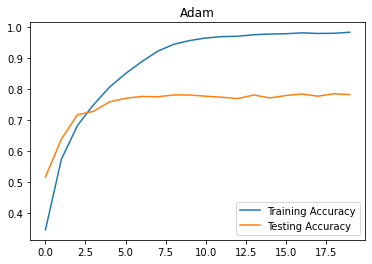

In [11]:
model = CIFAR10().to(device)
#print("lr,momentum,dampening,weight_decay,nesterov,maximize")
#print(one_combo)
train_acc=[]
test_acc=[]
# learning_rate = 0.0003
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
for epoch in range(num_epochs):
    total_training_accuracies = []
    total_testing_accuracies = []
    for img, labels in train_loader:
        img = img.to(device)
        labels = labels.to(device)
        pred = model(img)
        loss = loss_func(pred, labels)
        metrics = accuracy_score(pred, labels)
        total_training_accuracies.append(metrics)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Epoch Number: ", epoch, " | Training Accuracy Score: ", sum(total_training_accuracies)/len(total_training_accuracies))
    train_acc.append(sum(total_training_accuracies)/len(total_training_accuracies))
    for test_img, test_labels in test_loader:
        test_img = test_img.to(device)
        test_labels = test_labels.to(device)
        test_preds = model(test_img)
        metrics = accuracy_score(test_preds, test_labels)
        total_testing_accuracies.append(metrics)
    print("Epoch Number: ", epoch, " | Testing Accuracy Score: ", sum(total_testing_accuracies)/len(total_testing_accuracies))
    test_acc.append(sum(total_testing_accuracies)/len(total_testing_accuracies))
    
epochs = np.arange(0,num_epochs,1)
plt.title("Adam")
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, test_acc, label='Testing Accuracy')
plt.legend()
plt.show()